# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'C:\Users\induj\Downloads\iris.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display no. of samples on each class
df['Classification'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Preprocessing dataset

In [7]:
# check for null values
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

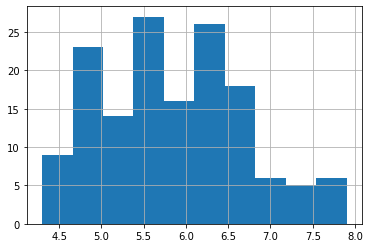

In [9]:
# histograms
df['SL'].hist()

<AxesSubplot:>

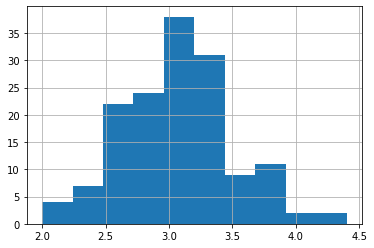

In [10]:
df['SW'].hist()

<AxesSubplot:>

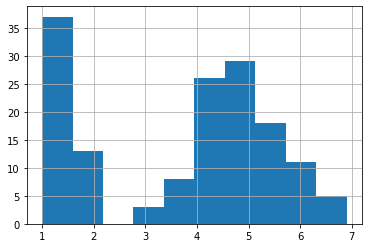

In [11]:
df['PL'].hist()

<AxesSubplot:>

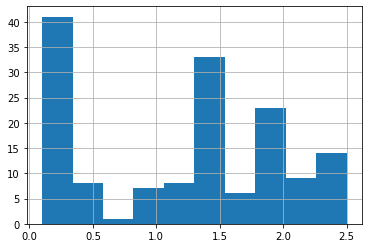

In [12]:
df['PW'].hist()

# Coorelation Matrix


In [13]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.109369,0.871754,0.817954
SW,-0.109369,1.000000,-0.420516,-0.356544
PL,0.871754,-0.420516,1.000000,0.962757
PW,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

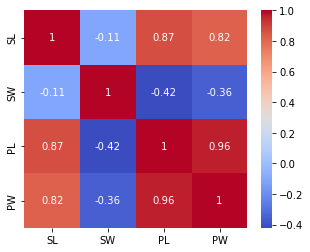

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')


# Label Encoder

In [15]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [16]:
#df['Classification'] = le.fit_transform(df['Classification'])
#df.head()


# Model Training

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Classification'])
Y = df['Classification']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


In [18]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [19]:
# model training
model.fit(x_train, y_train)


C:\Users\induj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [21]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [22]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [24]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [25]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [27]:
# save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))


In [28]:
x_test.head()


,SL,SW,PL,PW
33,5.5,4.2,1.4,0.2
117,7.7,3.8,6.7,2.2
10,5.4,3.7,1.5,0.2
5,5.4,3.9,1.7,0.4
89,5.5,2.5,4.0,1.3


In [29]:
load_model = pickle.load(open(filename,'rb'))

In [30]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

C:\Users\induj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)